In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from FunctionsRevision import Functions as fun

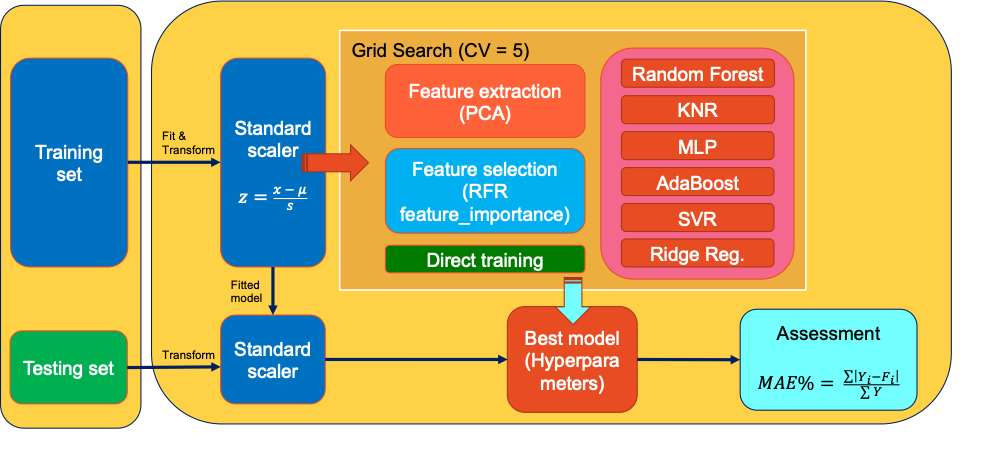

In [3]:
from IPython.display import Image
Image("./figures/2023/Framework.png")

In [4]:
targets = ['avgStallTimeFixed', 'throughput', 'initPlayingTime', 'videoDisplayRate', 'videoWidth', 'rtt', 'bufferDuration']
#Options = ['FS_WKQI', 'FS_NoKQI', 'FE_WKQI', 'FE_NoKQI', 'NoFE_WKQI', 'NoFE_NoKQI']
feature_modes = ['No_FE', 'FS', 'FE']
metric = 'MAEP'
scale = True

In [5]:
# Get the model scores from the results
scores = fun.get_scores(targets=targets, feature_modes=feature_modes, scale=scale)

# Estimate the pet score (pTime_weight = 0.5 means equally weight the pTime and the performance metric)
fun.estimate_pet_score(scores=scores, pTime_weight=0.5, pTime_norm_factor=10.0)

,algorithm,value,metric,pTime,feat_mode,target,ml_mode,n_pTime,PET_score,comp_PET_score
0,RF,62.566279,MAEP,2.987944,No_FE,avgStallTimeFixed,regression,0.298794,0.404442,0.595558
1,SVR,51.336589,MAEP,1.038311,No_FE,avgStallTimeFixed,regression,0.103831,0.172727,0.827273
2,RR,104.188211,MAEP,0.995957,No_FE,avgStallTimeFixed,regression,0.099596,0.181812,0.818188
3,NN,62.542237,MAEP,3.273328,No_FE,avgStallTimeFixed,regression,0.327333,0.429746,0.570254
4,ABR,41.922915,MAEP,4.6444,No_FE,avgStallTimeFixed,regression,0.46444,0.440678,0.559322
...,...,...,...,...,...,...,...,...,...,...
121,SVR,1.764197,MAEP,1.06435,FE,bufferDuration,regression,0.106435,0.030267,0.969733
122,RR,4.086699,MAEP,1.103752,FE,bufferDuration,regression,0.110375,0.059649,0.940351
123,NN,2.6154,MAEP,1.255871,FE,bufferDuration,regression,0.125587,0.043292,0.956708
124,ABR,3.052338,MAEP,4.85898,FE,bufferDuration,regression,0.485898,0.057439,0.942561


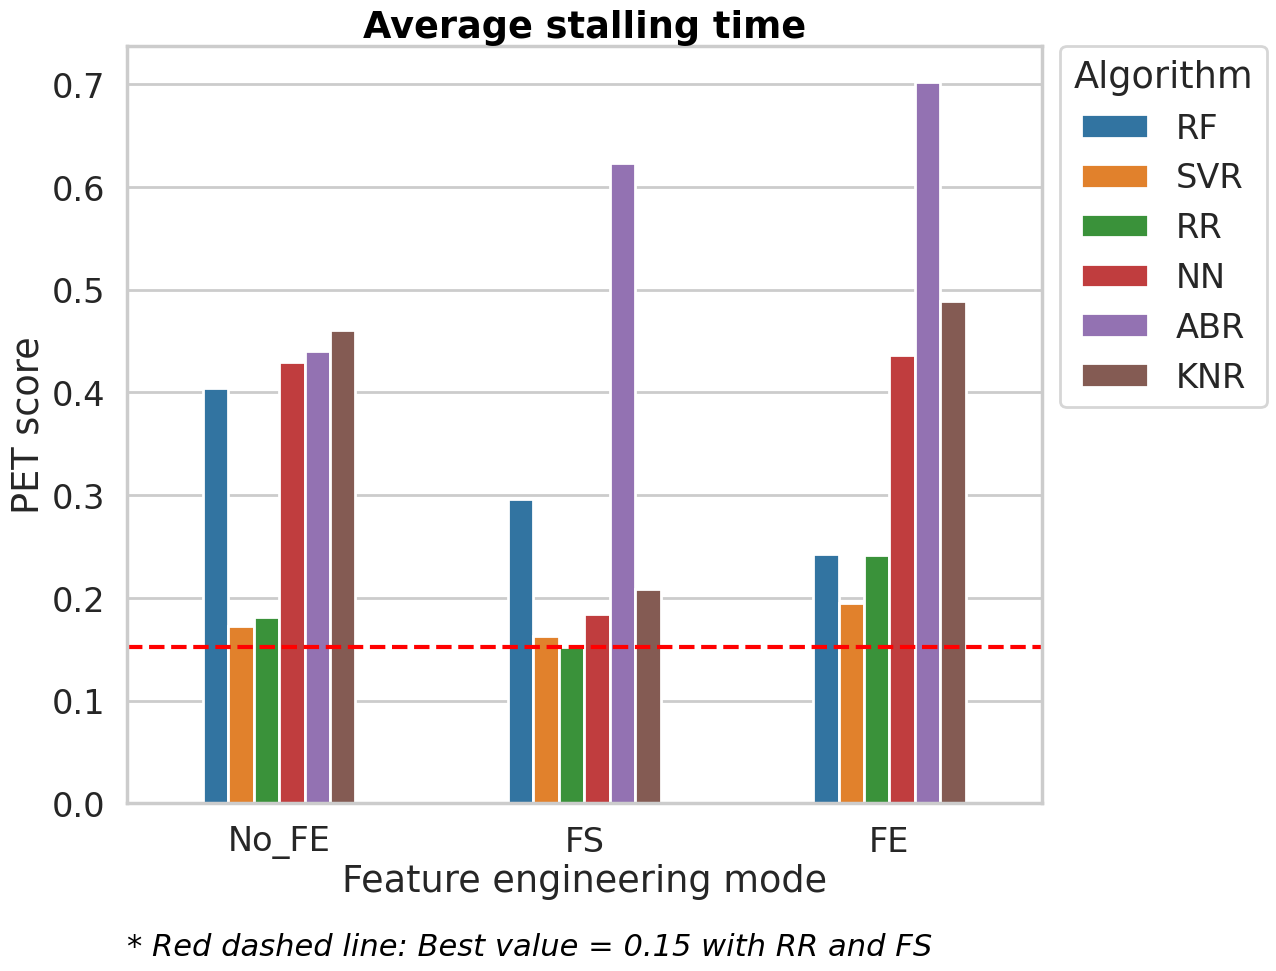

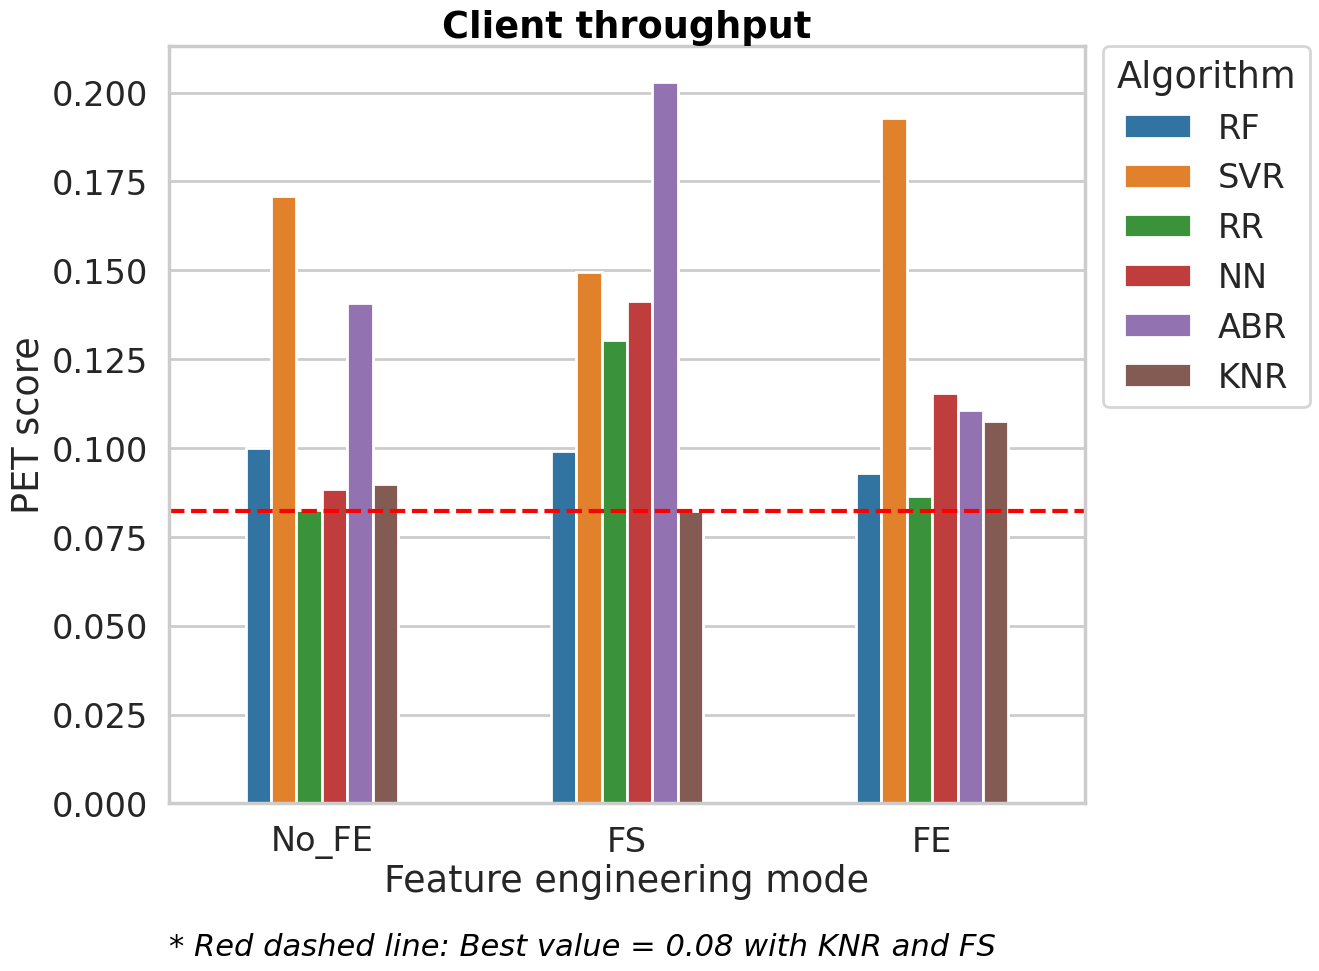

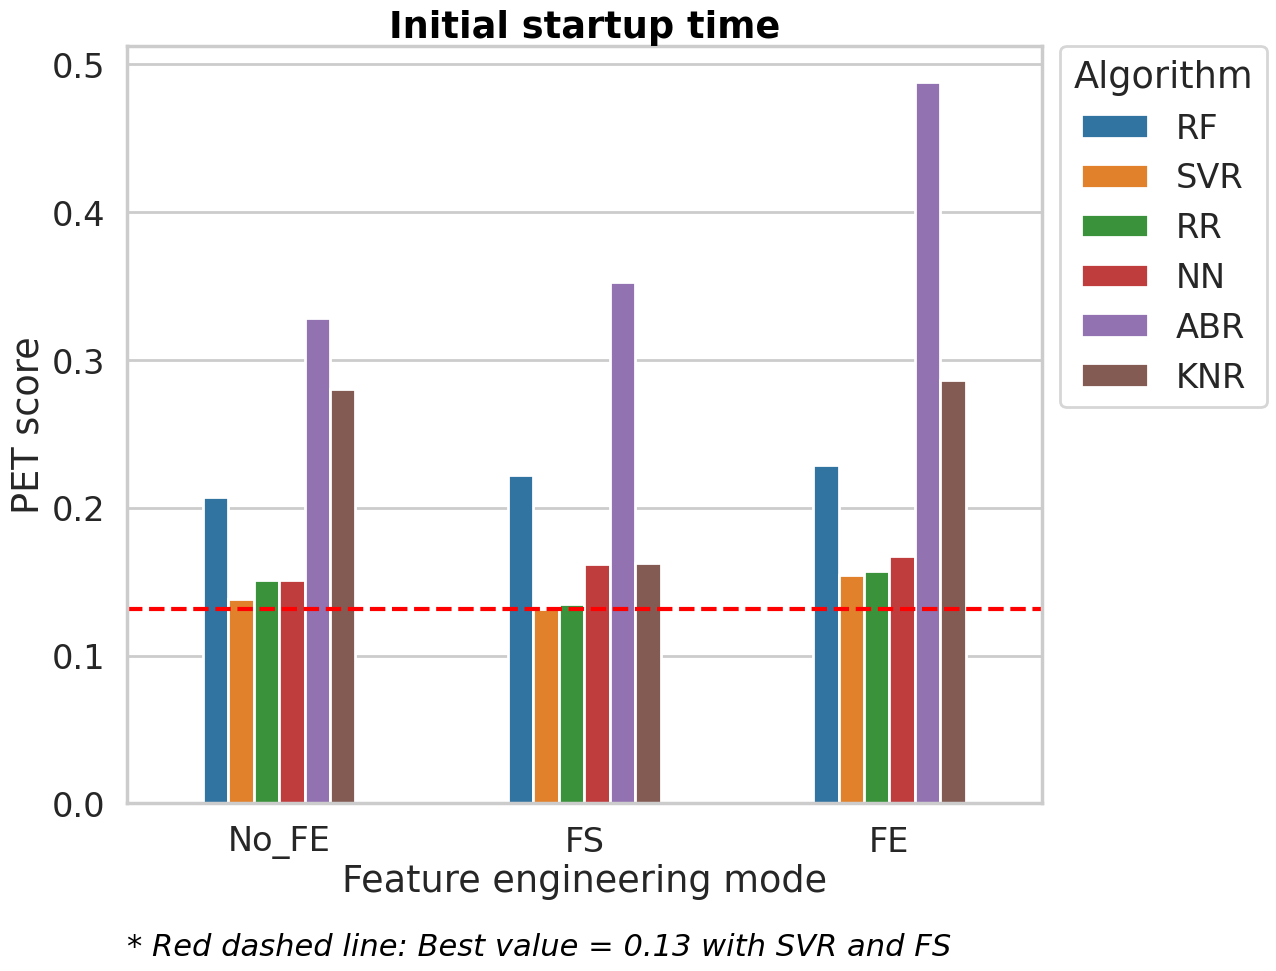

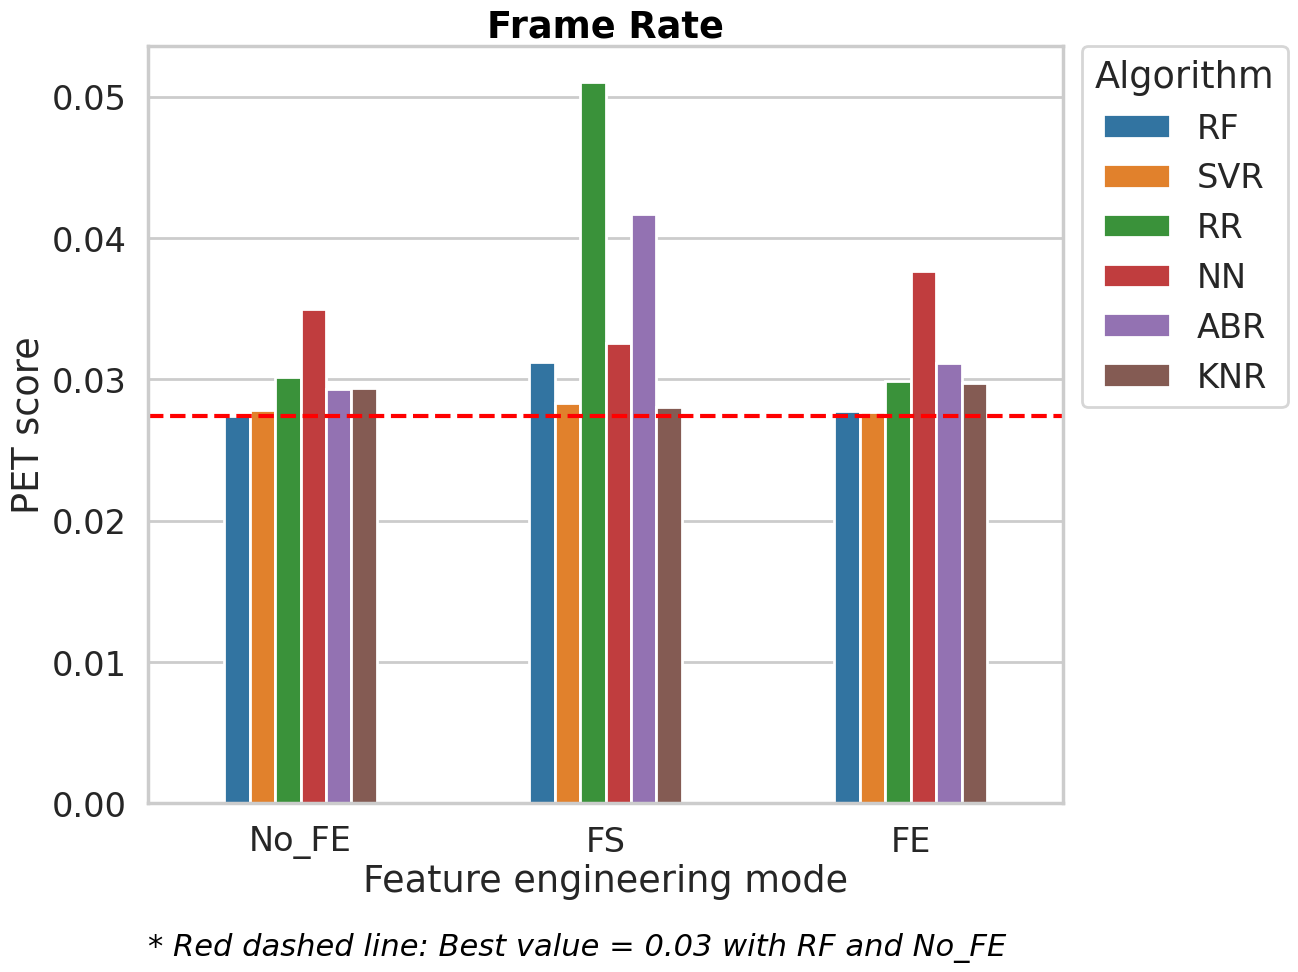

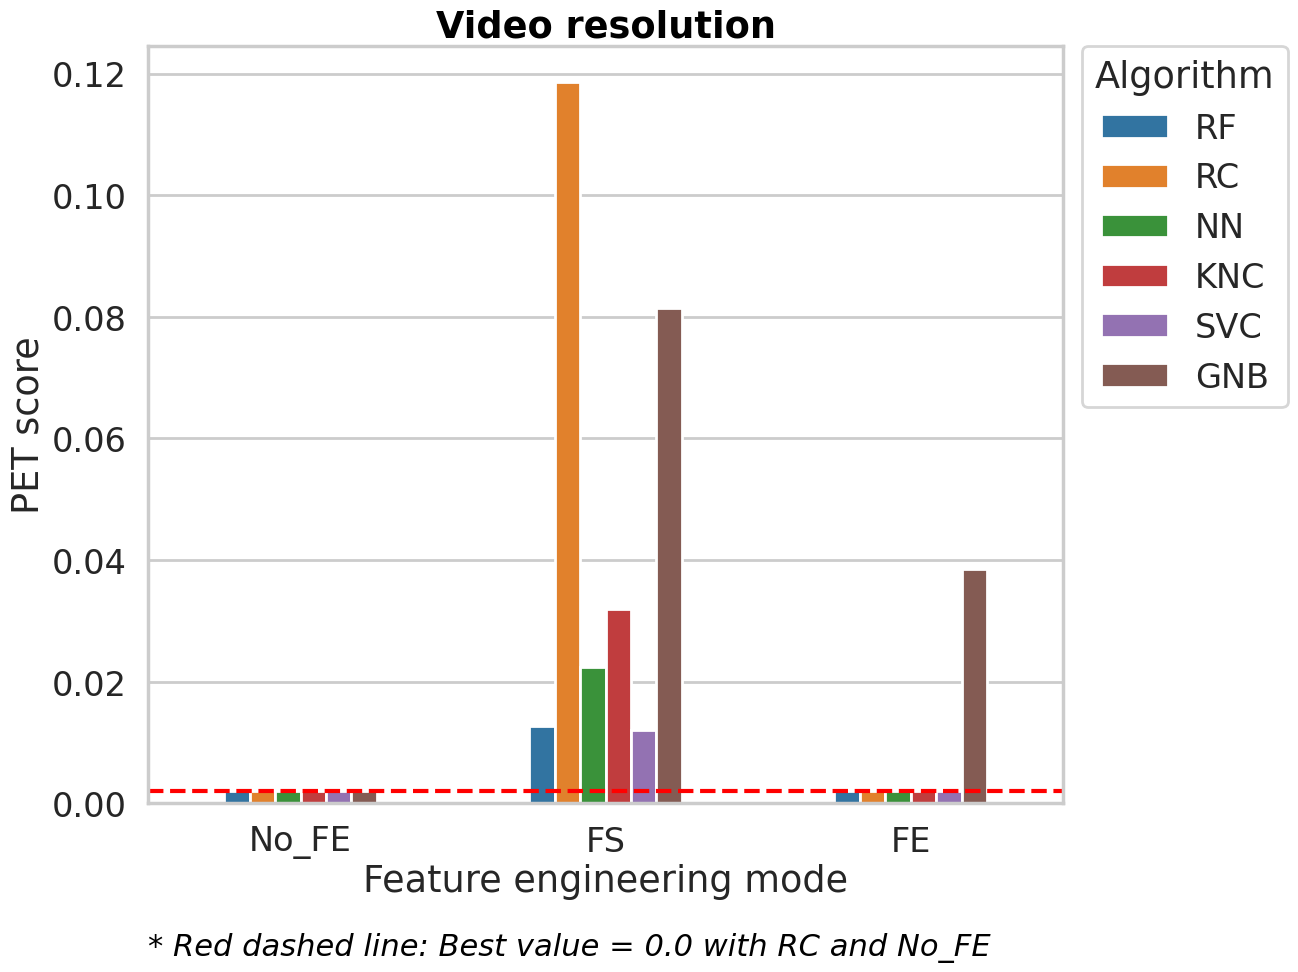

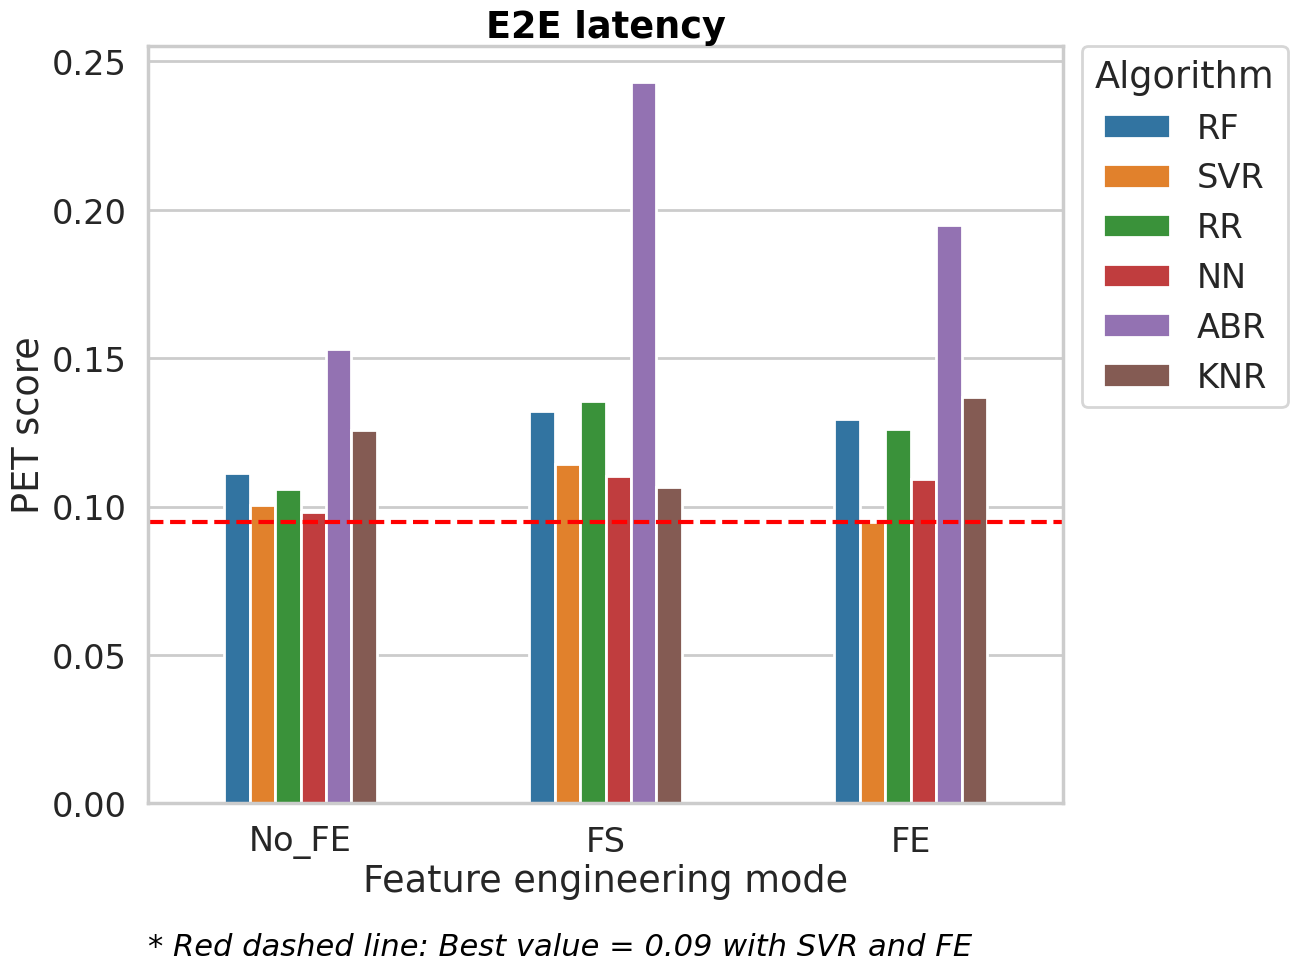

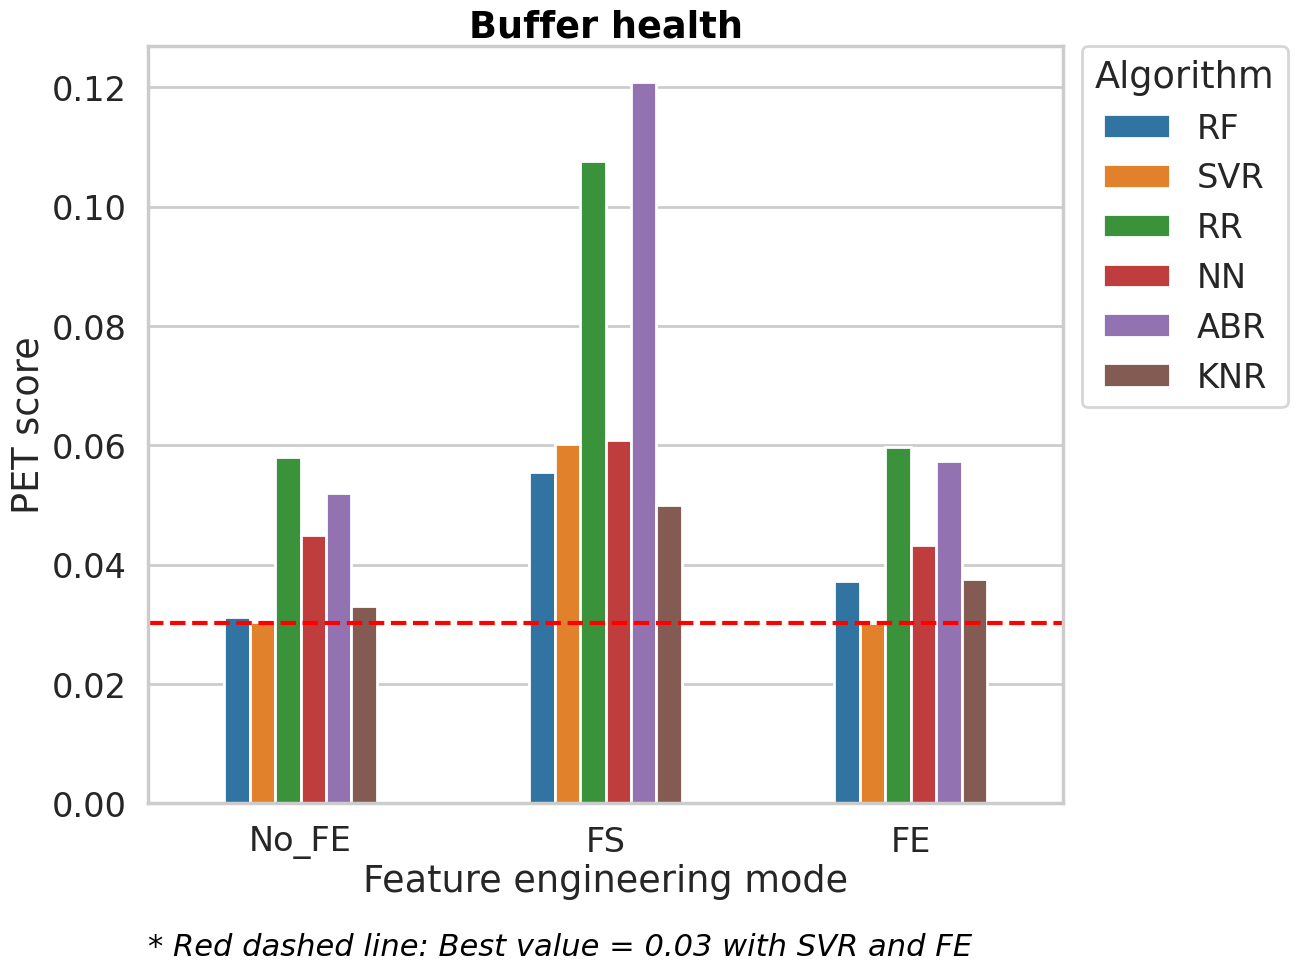

In [6]:
# fun.plotBars(scores=scores, targets=targets, orient='v', save_figure=False, additionalInfoName='OJCOMS', metric='pTime')
fun.plotBars(scores=scores, targets=targets, orient='v', save_figure=False, additionalInfoName='OJCOMS', metric = 'PET_score', path='./figures/2024-04-02/')

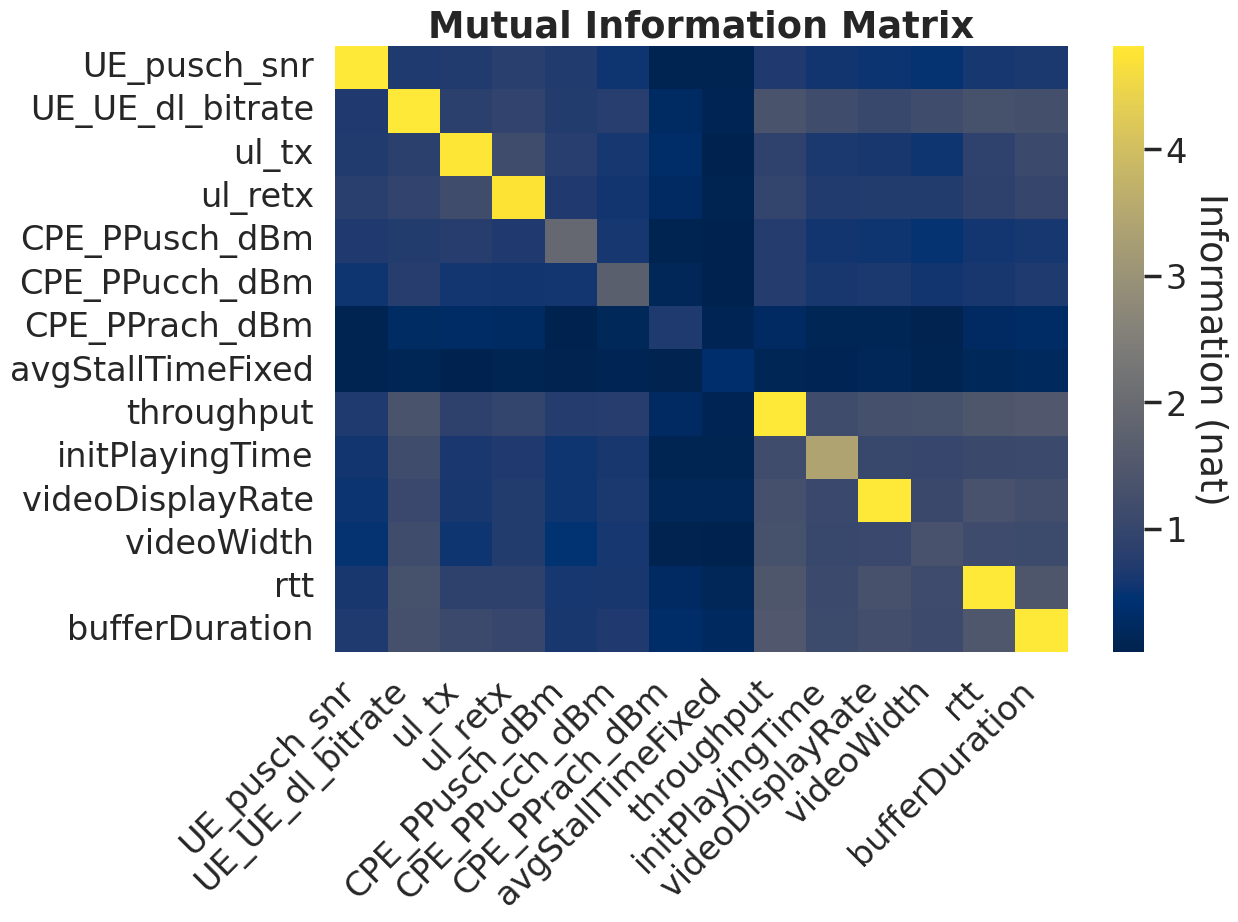

In [7]:
# Get the feature scores
feature_scores = (fun.get_feature_scores(targets=targets)).reset_index(inplace=False, drop=True)

# Calculate the MI between input features and targets and input features
MI = fun.get_mi_inputs_targets_baseline(targets=targets)

# Plot the MI matrix
fun.draw_heat_map(MI_df = MI, title='Mutual Information Matrix', cbar_label='Information (nat)', path='./figures/2024-04-02/', height_cm=20)

Figure saved as: ./figures/2024-04-02///OJCOMS_MI_targets_MI_heatmap.pdf



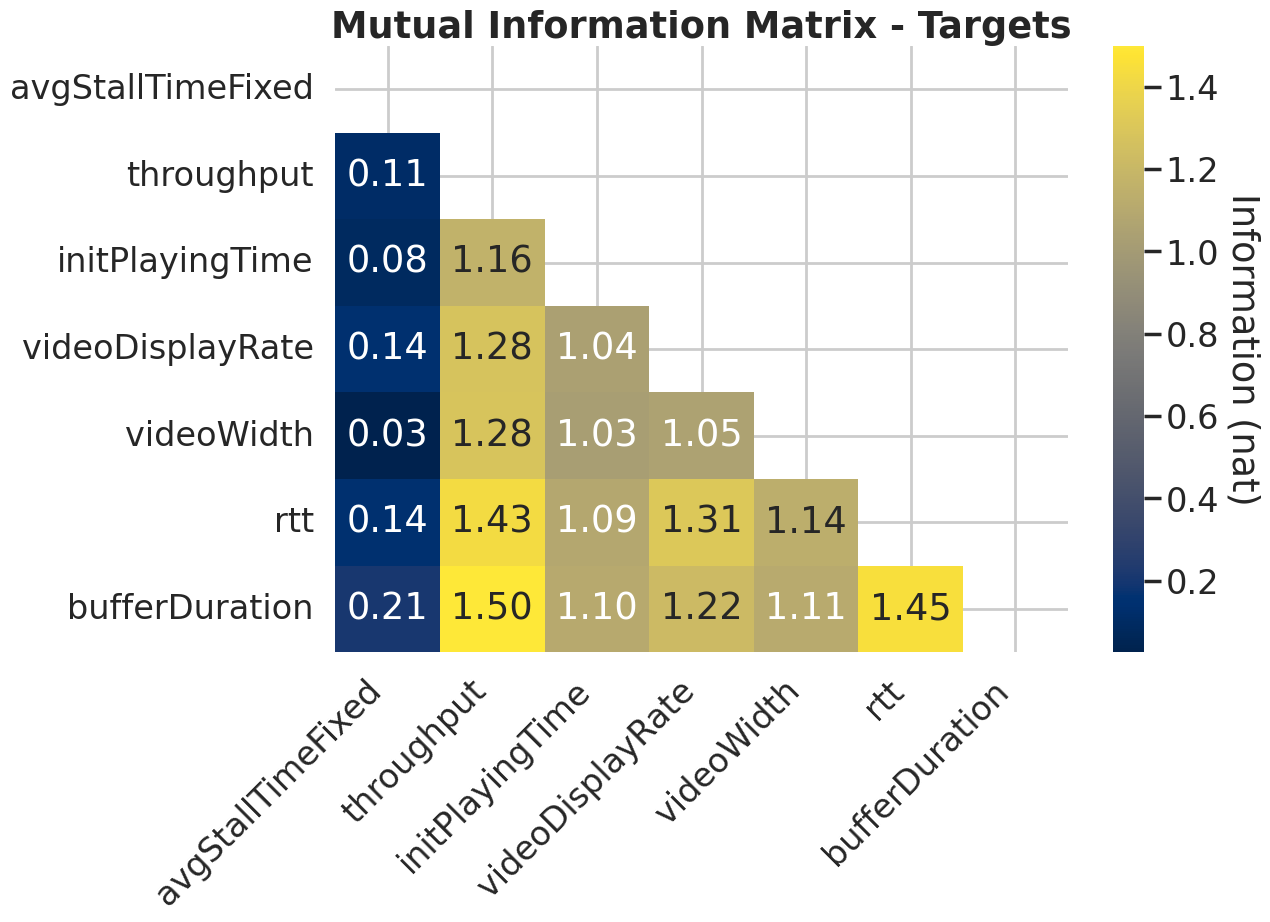

In [12]:
# Draw the MI matrix using only the targets
MI_targets = MI.loc[targets, targets]
fun.draw_heat_map(MI_df = MI_targets, title='Mutual Information Matrix - Targets', cbar_label='Information (nat)', path='./figures/2024-04-02/', 
                  height_cm=20, annot=True, save_figure=False, additionalInfoName='OJCOMS_MI_targets', draw_triangle=True)

********************* avgStallTimeFixed *********************
y1 ticks =  [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14]
y1 axis max = 0.12434857334124846
y1 max tick = 0.14
y1 n_ticks = 8
y2 max value = 2.271684397185985
proportion = 18.26868082315529
Adjust after last tick = 0
y2 axis max = 2.4869714668249694
y2 ticks = [0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2]
y2 max tick =3.2
********************* throughput *********************
y1 ticks =  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6]
y1 axis max = 1.411031039581756
y1 max tick = 1.6
y1 n_ticks = 9
y2 max value = 3.760278865604935
proportion = 2.664915767352304
Adjust after last tick = 0
y2 axis max = 4.233093118745268
y2 ticks = [0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4]
y2 max tick =5.4
********************* initPlayingTime *********************
y1 ticks =  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]
y1 axis max = 1.2305549722581266
y1 max tick = 1.4000000000000001
y1 n_ticks = 8
y2 max value = 0.34573374807706503
proportion = 0.28095758082438793
Adjust a

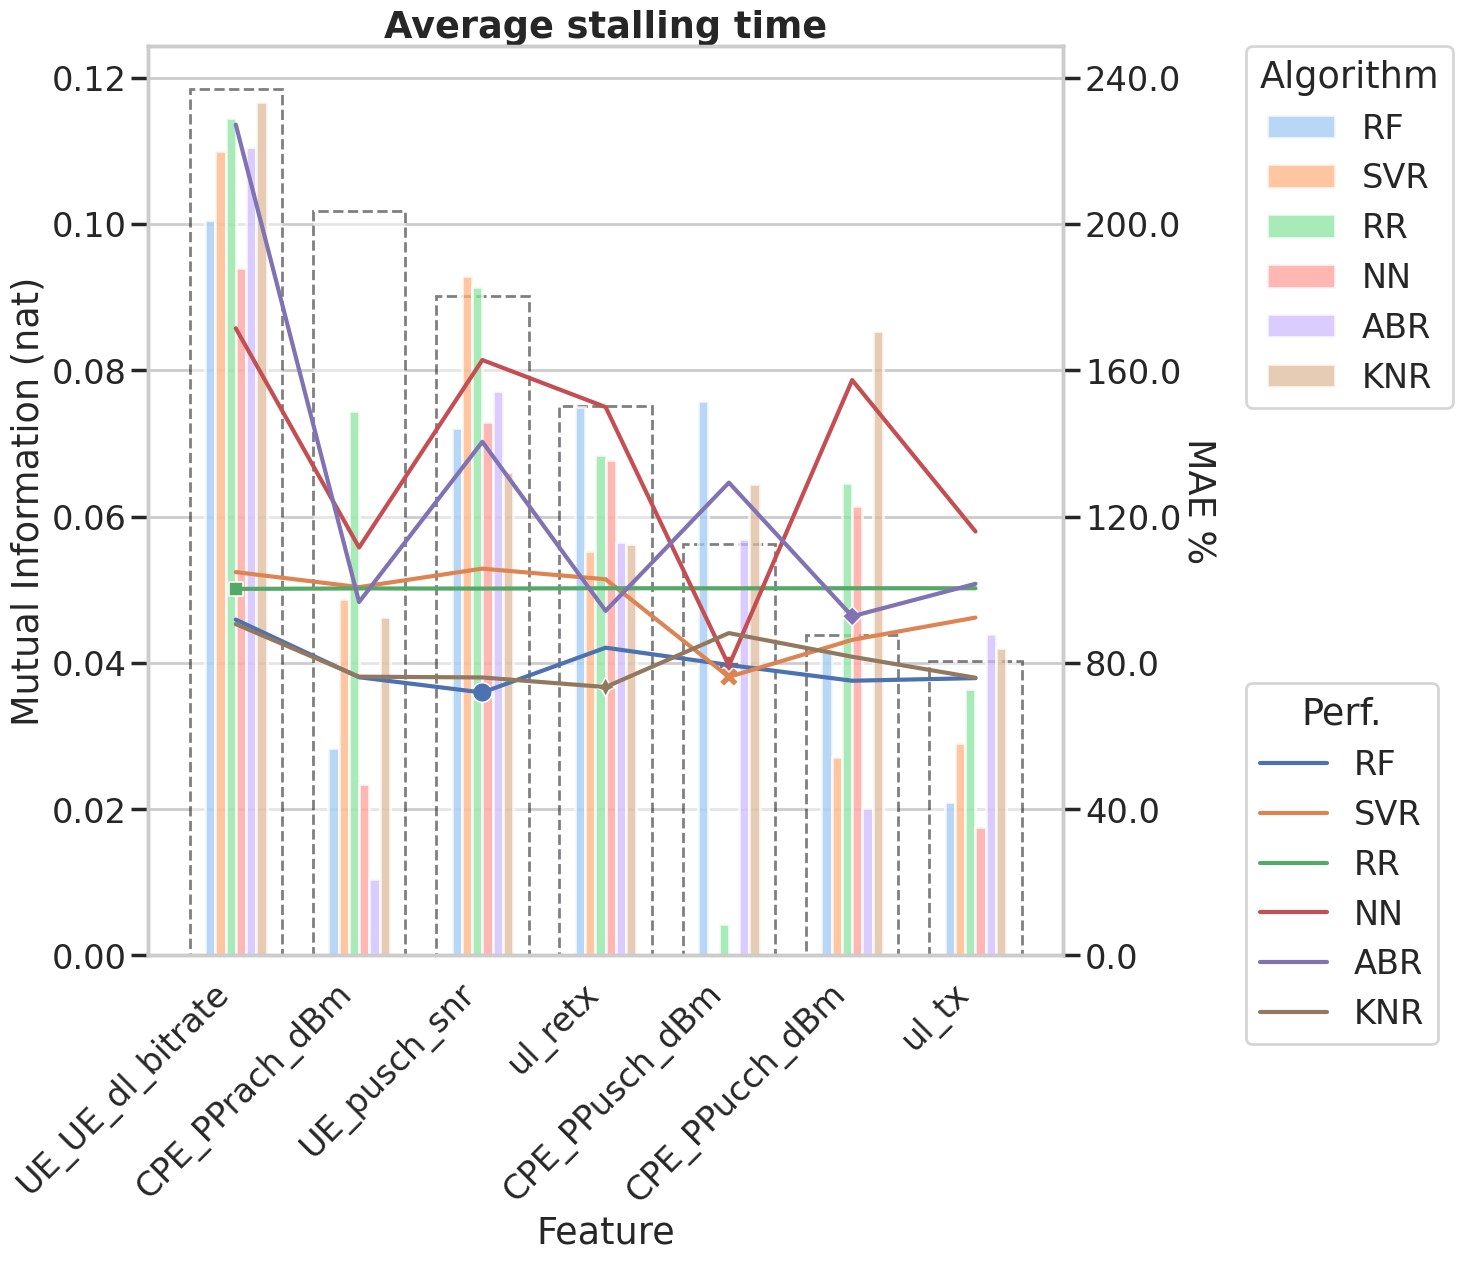

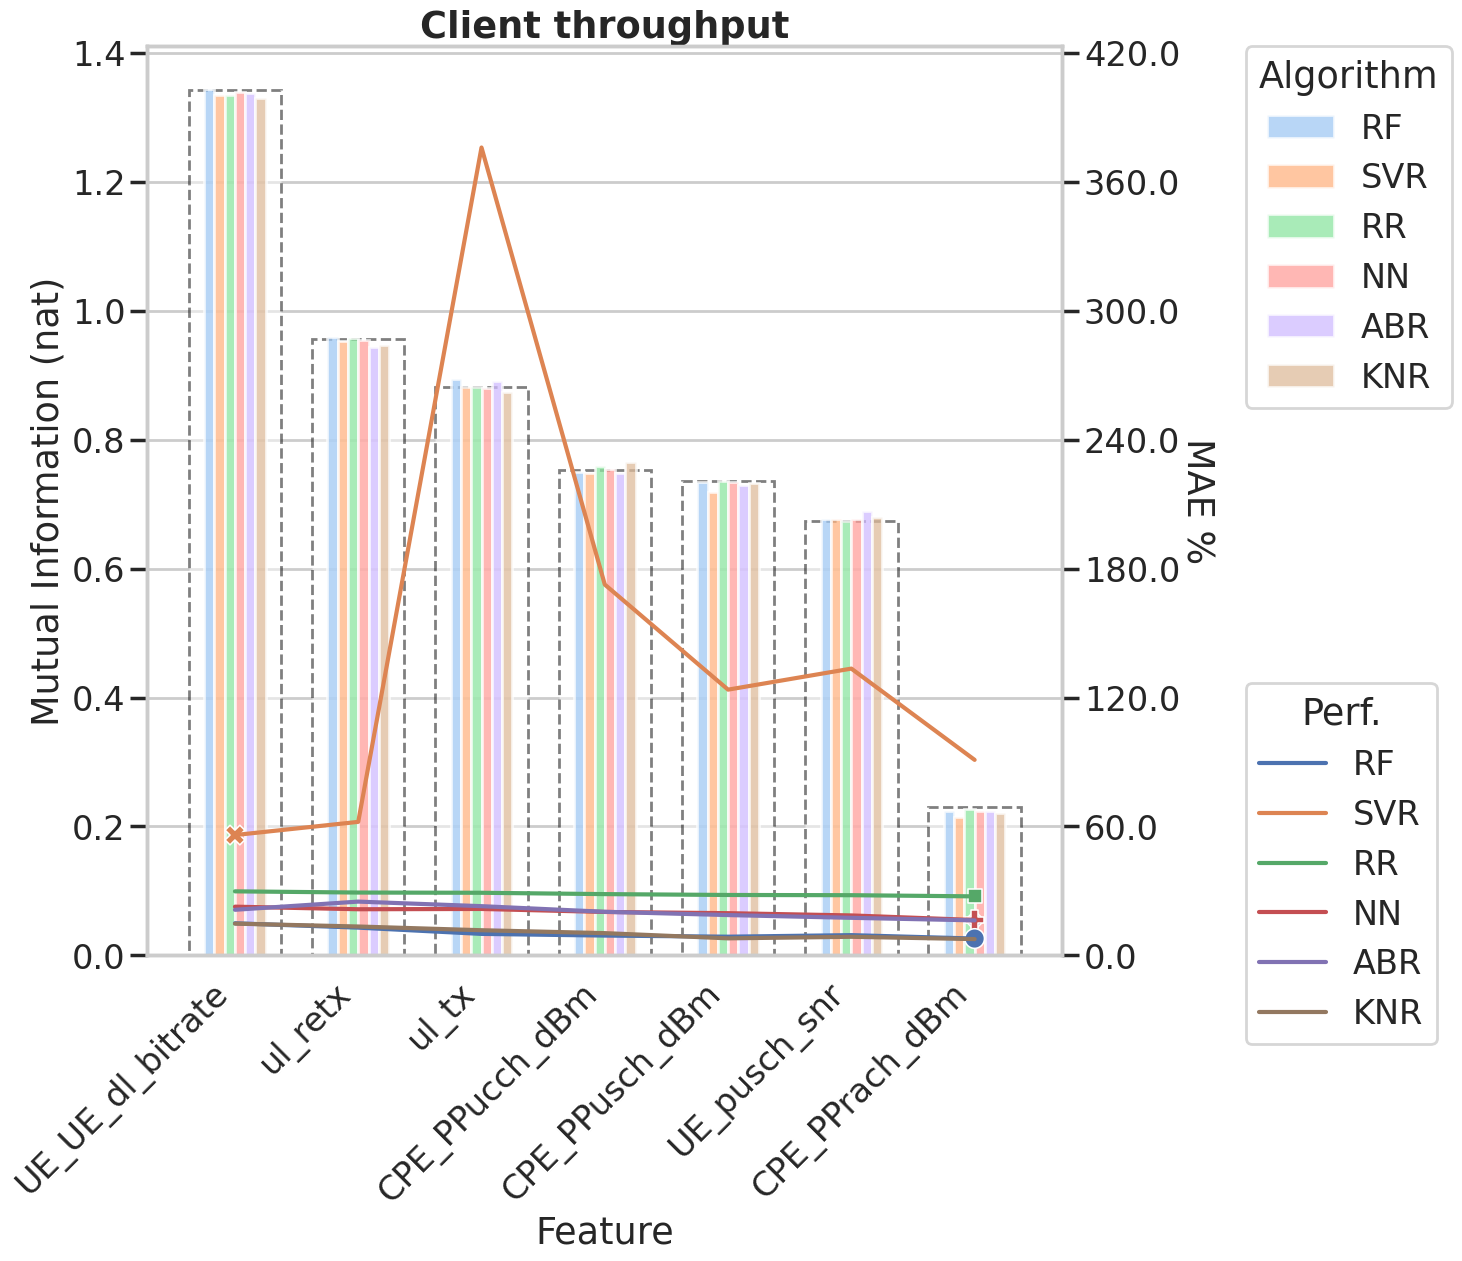

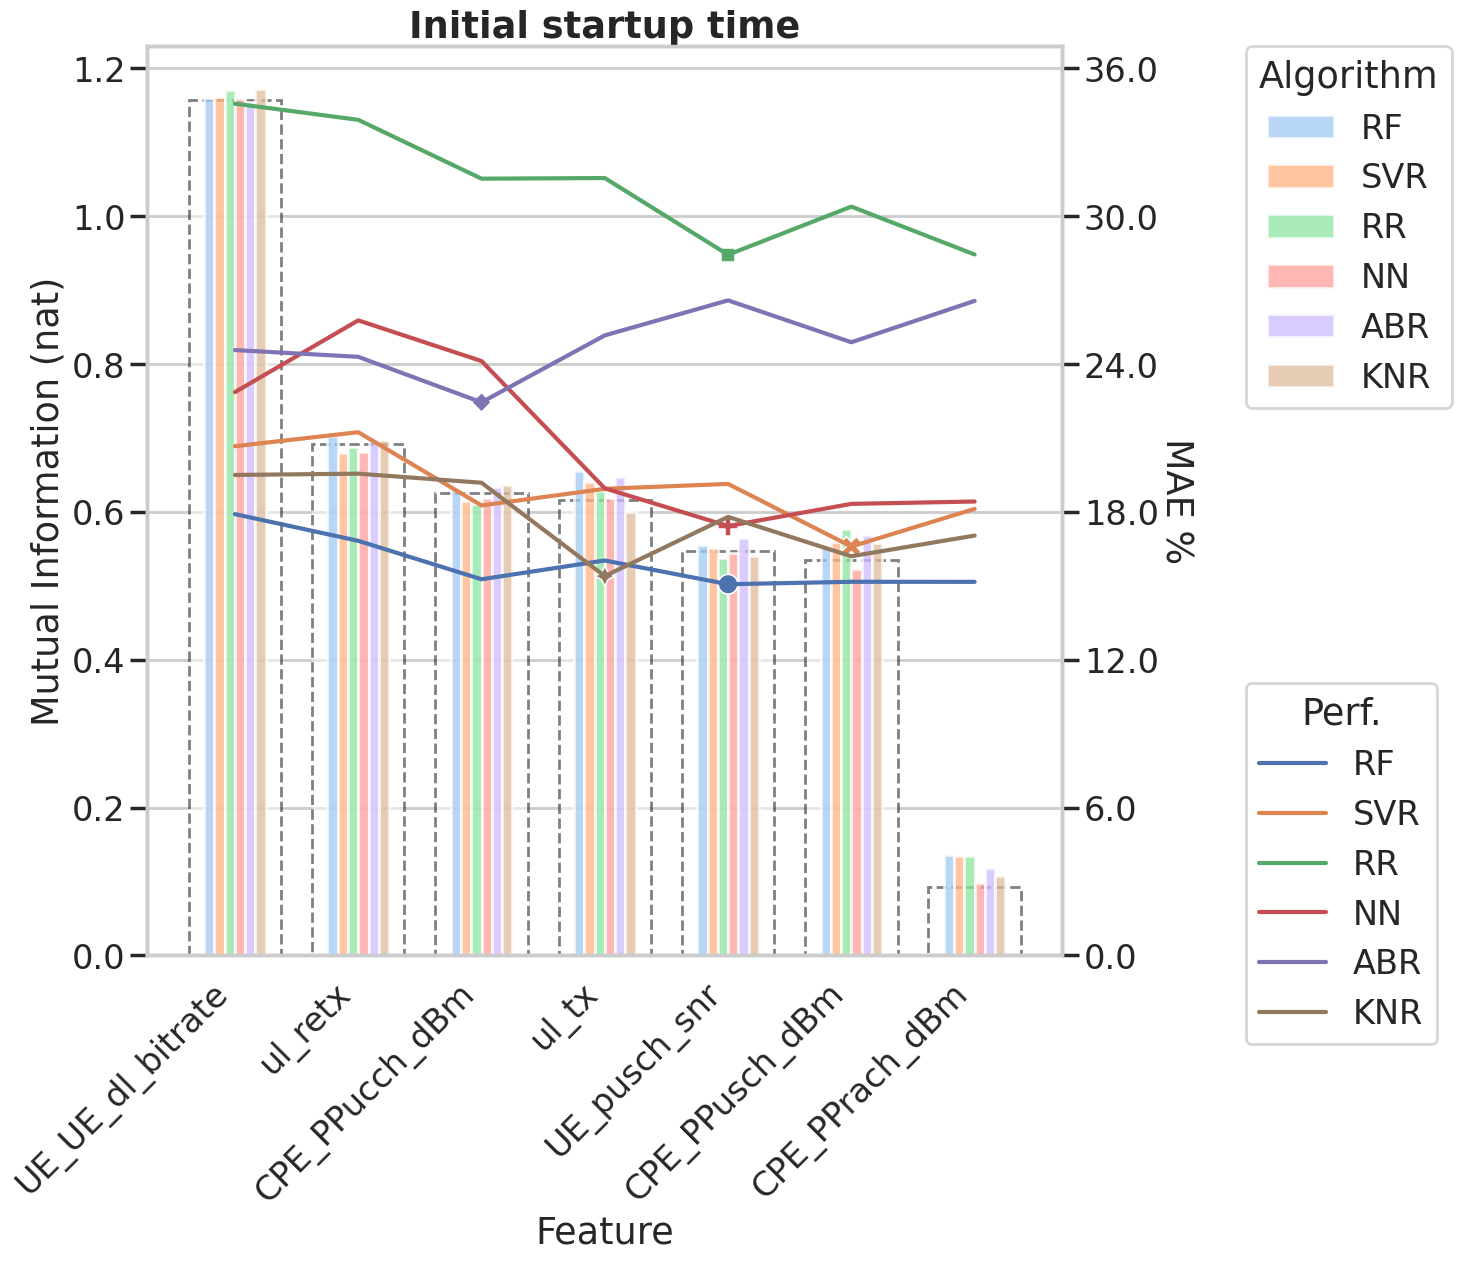

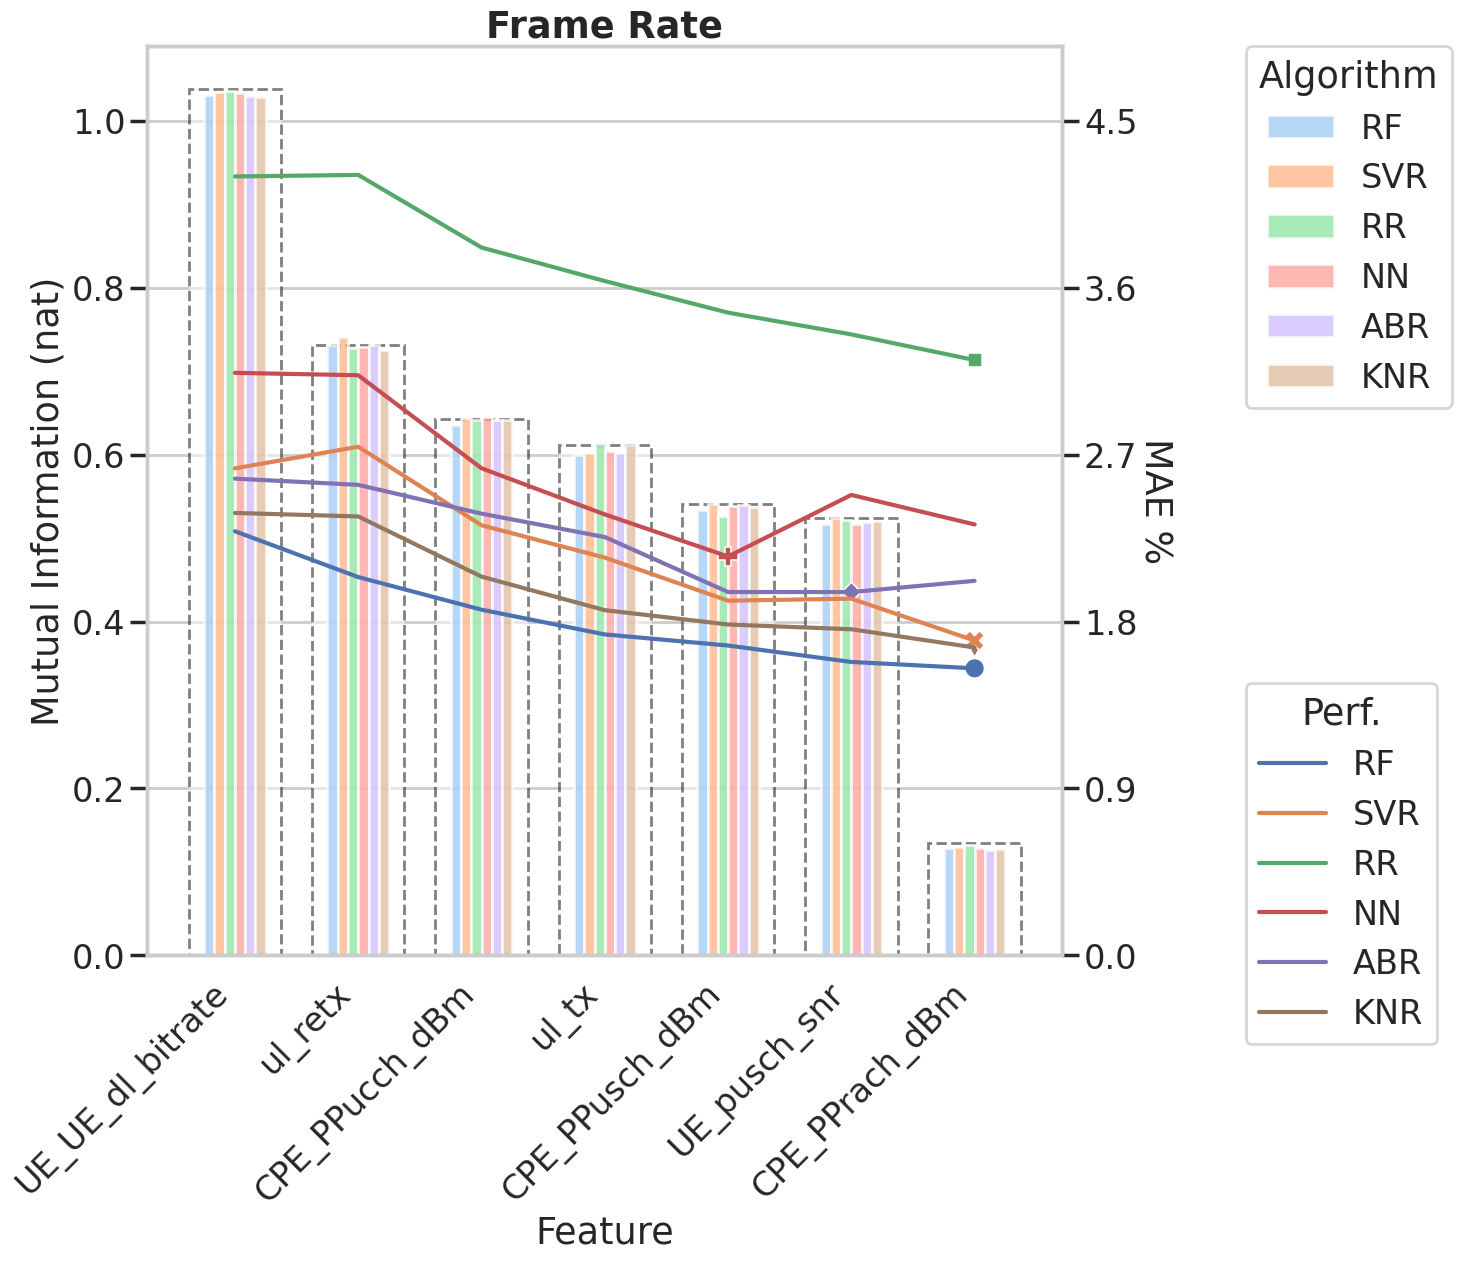

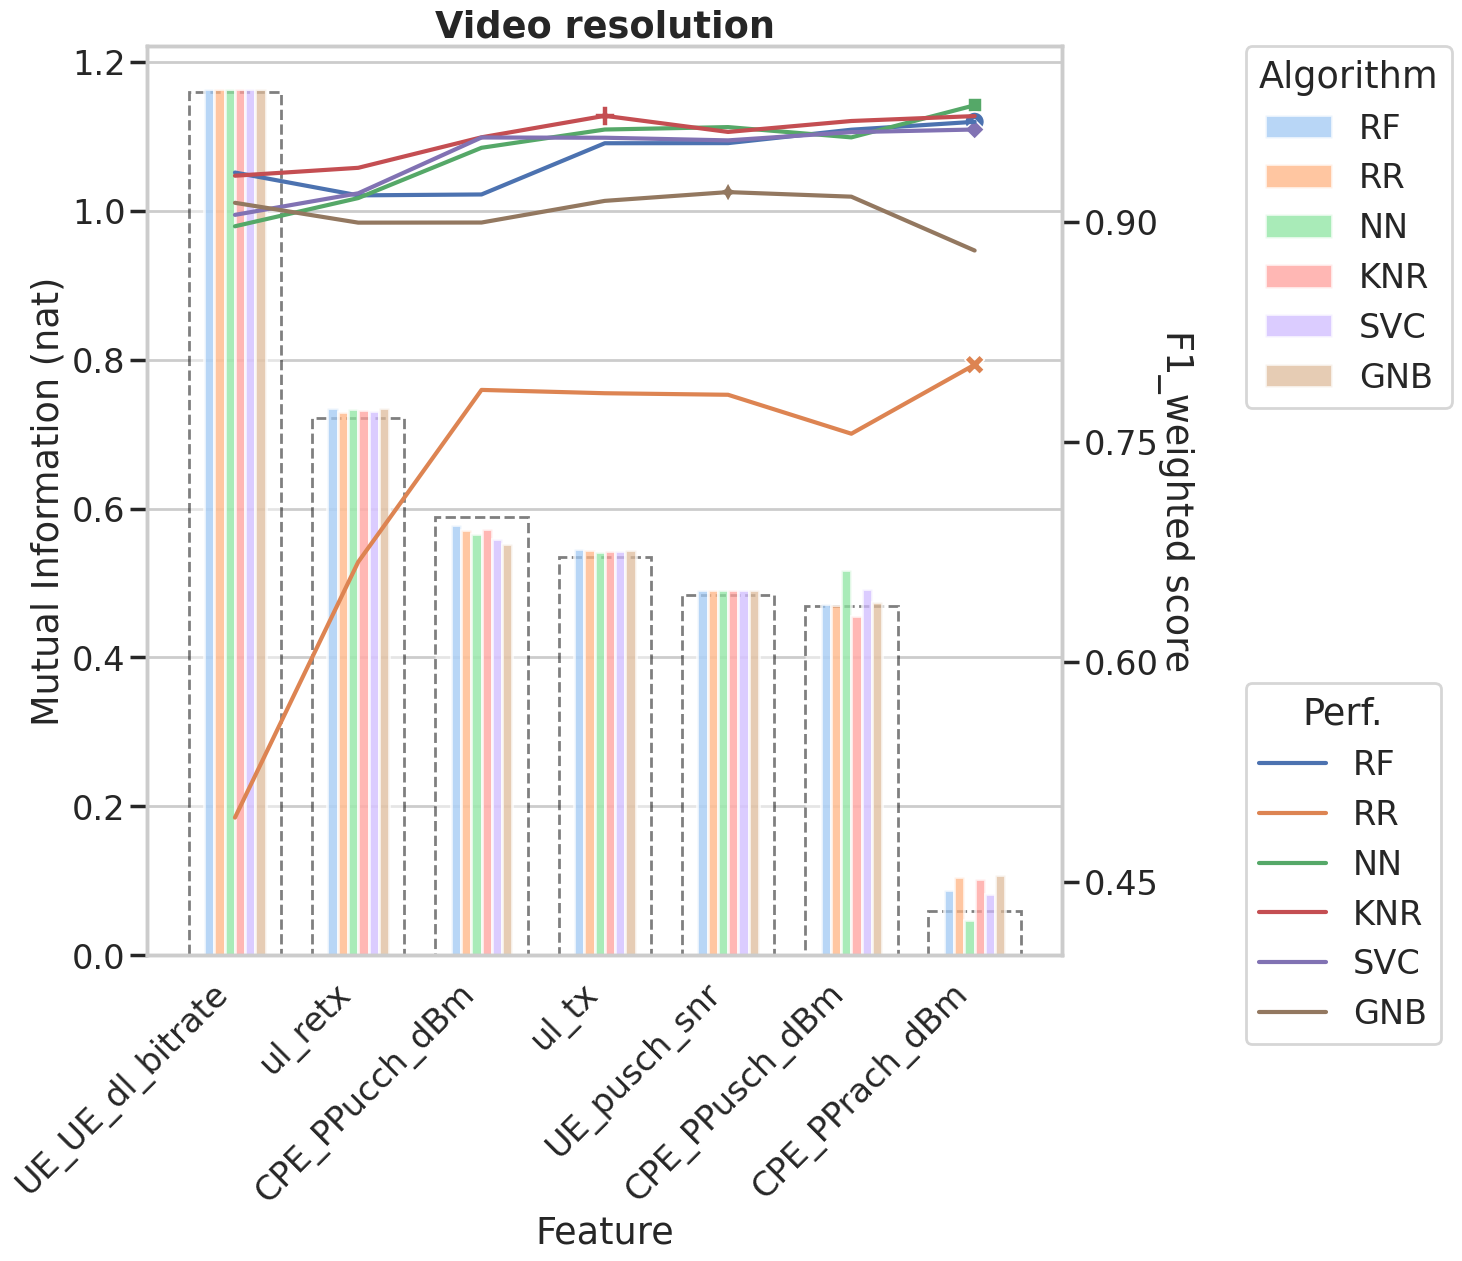

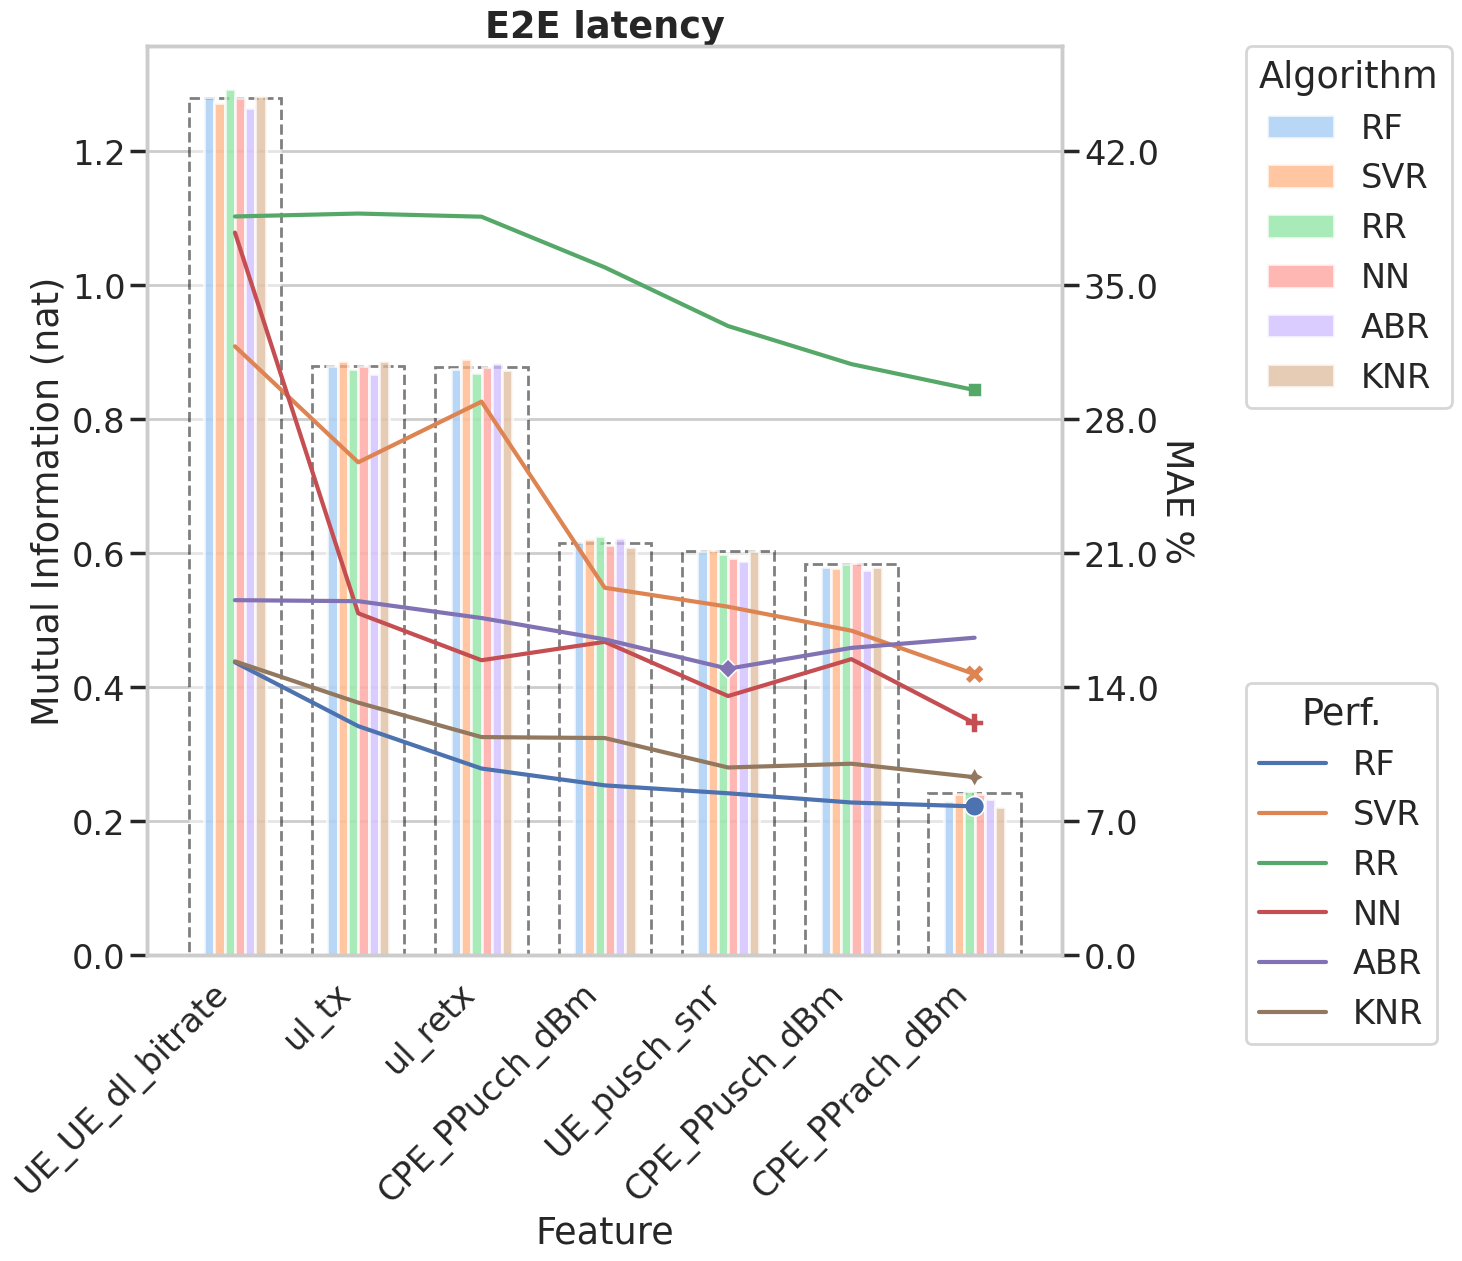

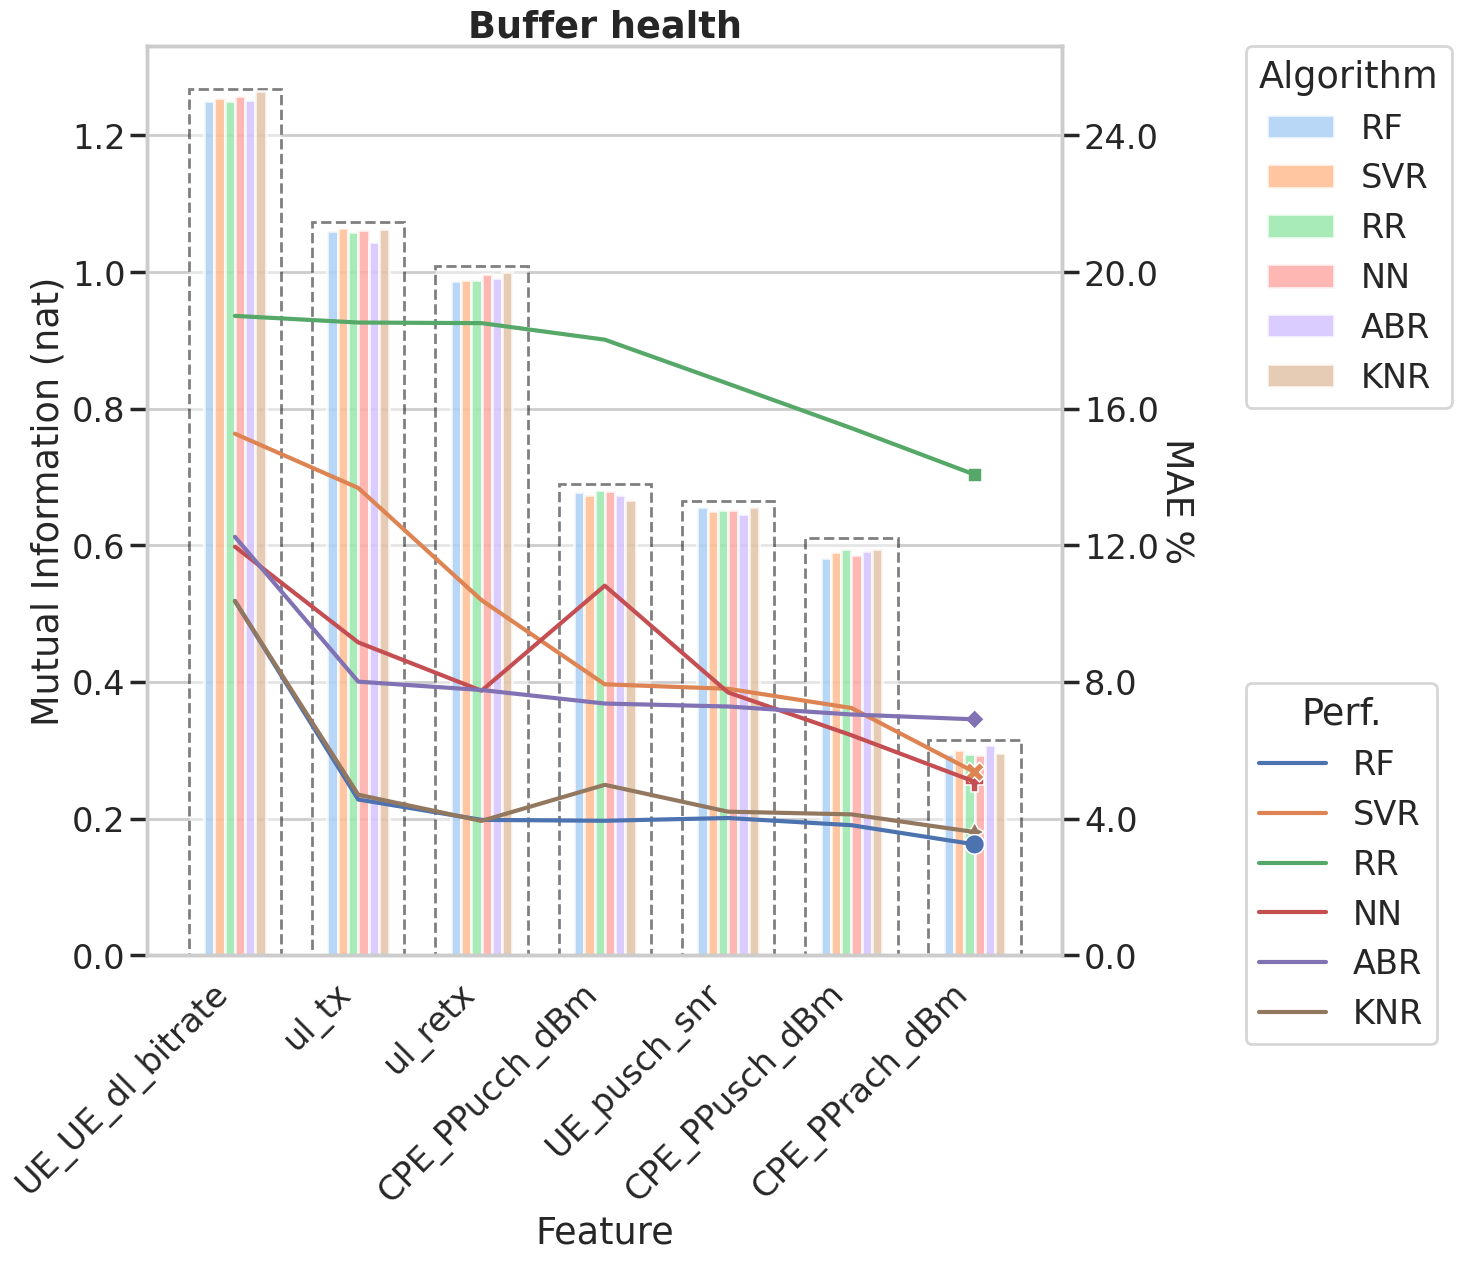

In [10]:
fun.draw_mi_perf_figure(targets=targets, feature_scores=feature_scores, MI_df=MI, xlabel_rotation=45, path='./figures/2024-04-02/', save_fig=False, verbose=True)

In [41]:
path = './stats_models/2024-03-21/'

_, best_params, best_params_overall = fun.get_best_model_params_in_path(path, save_json=True, path_save='./stats_models/2024-03-21/', best_model_overall=True)

JSON file have been saved in: ./stats_models/2024-03-21/summary_best_params.json
JSON file have been saved in: ./stats_models/2024-03-21/summary_best_params_overall.json


In [56]:
target = 'initPlayingTime'
algorithm = 'RF'
display(best_params_overall[best_params_overall.target == target].loc[:, ['model_parameters', 'algorithm', 'feature_mode']])

# Increase the width of the columns to display the model parameters
pd.set_option('display.max_colwidth', 200)

,model_parameters,algorithm,feature_mode
12,"{'feature_selection__k': 5, 'model__max_depth': 8, 'model__n_estimators': 30}",RF,FS
13,"{'feature_selection__k': 6, 'model__alpha': 46.41588833612782, 'model__fit_intercept': True}",RR,FS
14,"{'model__alpha': 0.01, 'model__hidden_layer_sizes': [80, 80, 80]}",NN,No_FE
15,"{'feature_selection__k': 4, 'model__leaf_size': 20, 'model__n_neighbors': 2, 'model__p': 2}",KNR,FS
16,"{'feature_selection__k': 5, 'model__C': 10.0, 'model__degree': 4, 'model__epsilon': 0.01, 'model__kernel': 'rbf'}",SVR,FS
17,"{'feature_selection__k': 4.0, 'model__learning_rate': 0.666, 'model__n_estimators': 50.0}",ABR,FS
